<a href="https://colab.research.google.com/github/newbiepawel/Hello-Github/blob/master/JP_morgan_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the below project I'm trying to find a model that uses US treasury rates to describe the deposit rate paid. Due to the fact that dependent and explanatory variables come with different time intervals(explanatory-daily, dependent-quarterly) first I need to convert data for the same time interval.
To do this I decided that the first observation within certain quarter(so first observation in Jaunuary, April, July and October) will be quarter value for every variable, the others will not be taken into account. There are some missing values for variables which I need to handle, I decided I will assign zero for such observation. I indentified tremendous amout of NULLs in DGS30 table aroun period 1999 - 2004 but on FRED site I downloaded a new one DGS30 file where are not so many missing values. Every step I do I try to describe as clear as possible. 

Project is devided into 3 steps:

-Data engineering

-Gradient Descent algorithm(Bonus)

-Modelling
 
In the task is also mentioned:
If time permits, you could but don’t have to explore beyond
what’s provided. I decided to do some risk estimation(VaR and ES) for deposit rate paid using GARCH model and Monte Carlo simulation.
I'm going to use R to do this.
It will come in separate file.

#Data engineering

In [1]:
import warnings
warnings.filterwarnings('ignore')

Loading the data

In the tables I indentified NULL values and I assigned 0 to them.
I will take it on during the data cleaning

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Deposit Interest.xlsx to Deposit Interest.xlsx
Saving DGS1.csv to DGS1.csv
Saving DGS1MO.csv to DGS1MO.csv
Saving DGS2.csv to DGS2.csv
Saving DGS3MO.csv to DGS3MO.csv
Saving DGS5.csv to DGS5.csv
Saving DGS6MO.csv to DGS6MO.csv
Saving DGS7.csv to DGS7.csv
Saving DGS10.csv to DGS10.csv
Saving DGS20.csv to DGS20.csv
Saving DGS30.csv to DGS30.csv


In [3]:
import io
import pandas as pd
rate = pd.read_excel(io.BytesIO(uploaded['Deposit Interest.xlsx']))
DGS1 = pd.read_csv(io.BytesIO(uploaded['DGS1.csv']), sep = ';', decimal=',')
DGS1MO = pd.read_csv(io.BytesIO(uploaded['DGS1MO.csv']), sep = ';', decimal = ',')
DGS2 = pd.read_csv(io.BytesIO(uploaded['DGS2.csv']), sep = ';', decimal=',')
DGS3MO = pd.read_csv(io.BytesIO(uploaded['DGS3MO.csv']), sep = ';', decimal=',')
DGS5 = pd.read_csv(io.BytesIO(uploaded['DGS5.csv']), sep = ';', decimal=',')
DGS6MO = pd.read_csv(io.BytesIO(uploaded['DGS6MO.csv']), sep = ';', decimal=',')
DGS7 = pd.read_csv(io.BytesIO(uploaded['DGS7.csv']), sep = ';', decimal=',')
DGS10 = pd.read_csv(io.BytesIO(uploaded['DGS10.csv']), sep = ';', decimal=',')
DGS20 = pd.read_csv(io.BytesIO(uploaded['DGS20.csv']), sep = ';', decimal=',')
DGS30 = pd.read_csv(io.BytesIO(uploaded['DGS30.csv']), sep = ';', decimal=',')

Thirst I want to see the structure of every table and if there are any NULLs

In the table where is a dependent variable the oldest date is 1084Q1 so I expect in all tables where are explanatory variables the oldest date would be at least 1984Q1 otherwise I should consider ignore such variables due to the fact that there is only 136 observations since 1984Q1 and reduce it even more could result in a high variance.

In [4]:
print('dimension of the table:', rate.shape)
print(rate.isnull().sum())
rate.head()

dimension of the table: (136, 5)
YYYYQQ                                   0
Foreign deposits                         0
Domestic deposits interest-bearing       0
Domestic deposits noninterest-bearing    0
Total interest expense                   0
dtype: int64


,YYYYQQ,Foreign deposits,Domestic deposits interest-bearing,Domestic deposits noninterest-bearing,Total interest expense
0,1984Q1,346927.996,1860604.628,363955.726,59109.697
1,1984Q2,345313.290,1921612.686,379300.050,62633.848
2,1984Q3,326893.665,1964712.984,364125.250,67994.237
3,1984Q4,317569.815,2043037.290,421535.819,67890.338
4,1985Q1,332165.522,2086013.731,371462.367,65997.470


In [5]:
print('dimension of the table:', DGS1.shape)
print(DGS1.isnull().sum())
DGS1.head()

dimension of the table: (14686, 2)
DATE    0
DGS1    0
dtype: int64


,DATE,DGS1
0,02.01.1962,3.22
1,03.01.1962,3.24
2,04.01.1962,3.24
3,05.01.1962,3.26
4,08.01.1962,3.31


For DGS1MO the oldest date is 31.07.2001 so I should consider ignoring this variable

In [6]:
print('dimension of the table:', DGS1MO.shape)
print(DGS1MO.isnull().sum())
DGS1MO.head()

dimension of the table: (4361, 2)
DATE      0
DGS1MO    0
dtype: int64


,DATE,DGS1MO
0,31.07.2001,3.67
1,01.08.2001,3.65
2,02.08.2001,3.65
3,03.08.2001,3.63
4,06.08.2001,3.62


In [7]:
print('dimension of the table:', DGS2.shape)
print(DGS2.isnull().sum())
DGS2.head()

dimension of the table: (10926, 2)
DATE    0
DGS2    0
dtype: int64


,DATE,DGS2
0,01.06.1976,7.26
1,02.06.1976,7.23
2,03.06.1976,7.22
3,04.06.1976,7.12
4,07.06.1976,7.90


In [8]:
print('dimension of the table:', DGS3MO.shape)
print(DGS3MO.isnull().sum())
DGS3MO.head()

dimension of the table: (9467, 2)
DATE      0
DGS3MO    0
dtype: int64


,DATE,DGS3MO
0,04.01.1982,11.87
1,05.01.1982,12.20
2,06.01.1982,12.16
3,07.01.1982,12.17
4,08.01.1982,11.98


In [9]:
print('dimension of the table:', DGS5.shape)
print(DGS5.isnull().sum())
DGS5.head()

dimension of the table: (14686, 2)
DATE    0
DGS5    0
dtype: int64


,DATE,DGS5
0,02.01.1962,3.88
1,03.01.1962,3.87
2,04.01.1962,3.86
3,05.01.1962,3.89
4,08.01.1962,3.91


In [10]:
print('dimension of the table:', DGS6MO.shape)
print(DGS6MO.isnull().sum())
DGS6MO.head()

dimension of the table: (9467, 2)
DATE      0
DGS6MO    0
dtype: int64


,DATE,DGS6MO
0,04.01.1982,13.16
1,05.01.1982,13.41
2,06.01.1982,13.46
3,07.01.1982,13.43
4,08.01.1982,13.35


In [11]:
print('dimension of the table:', DGS7.shape)
print(DGS7.isnull().sum())
DGS7.head()

dimension of the table: (12731, 2)
DATE    0
DGS7    0
dtype: int64


,DATE,DGS7
0,01.07.1969,6.88
1,02.07.1969,6.89
2,03.07.1969,6.85
3,04.07.1969,0.00
4,07.07.1969,6.86


In [12]:
print('dimension of the table:', DGS10.shape)
print(DGS10.isnull().sum())
DGS10.head()

dimension of the table: (14686, 2)
DATE     0
DGS10    0
dtype: int64


,DATE,DGS10
0,02.01.1962,4.06
1,03.01.1962,4.03
2,04.01.1962,3.99
3,05.01.1962,4.02
4,08.01.1962,4.03


In [13]:
print('dimension of the table:', DGS20.shape)
print(DGS20.isnull().sum())
DGS20.head()

dimension of the table: (6403, 2)
DATE     0
DGS20    0
dtype: int64


,DATE,DGS20
0,01.10.1993,6.12
1,04.10.1993,6.10
2,05.10.1993,6.12
3,06.10.1993,6.12
4,07.10.1993,6.11


In [14]:
print('dimension of the table:', DGS30.shape)
print(DGS30.isnull().sum())
DGS30.head()

dimension of the table: (11358, 2)
DATE     0
DGS30    0
dtype: int64


,DATE,DGS30
0,15.02.1977,7.70
1,16.02.1977,7.67
2,17.02.1977,7.67
3,18.02.1977,7.76
4,21.02.1977,0.00


Creating a function which enable me extract a month from a date.
I will be usefull for me in future data engineering.

In [15]:
def month(data):
  a = []
  for i in range(0, len(data)):
    a.append(data['DATE'][i][3:5])       
  return(a)

In [16]:
DGS1['Month'] = month(DGS1)
DGS1MO['Month'] = month(DGS1MO)
DGS2['Month'] = month(DGS2)
DGS3MO['Month'] = month(DGS3MO)
DGS5['Month'] = month(DGS5)
DGS6MO['Month'] = month(DGS6MO)
DGS7['Month'] = month(DGS7)
DGS10['Month'] = month(DGS10)
DGS20['Month'] = month(DGS20)
DGS30['Month'] = month(DGS30)

In [17]:
DGS1.head()

,DATE,DGS1,Month
0,02.01.1962,3.22,01
1,03.01.1962,3.24,01
2,04.01.1962,3.24,01
3,05.01.1962,3.26,01
4,08.01.1962,3.31,01


Function which assign 1 if the observation is the first observation in a given month. It's just to make easier converting data to desired(Quarter) format later on

In [18]:
def func(data):
  a = [1]
  for i in range(1, len(data)):
    if int(data['DATE'][i][-4:]) > int(data['DATE'][i-1][-4:]):
      a.append(1)
    elif data['Month'][i] > data['Month'][i-1]:
      a.append(1)
    else:
      a.append(0)  
  return(a)  

In [19]:
DGS1['func'] = func(DGS1)
DGS1MO['func'] = func(DGS1MO)
DGS2['func'] = func(DGS2)
DGS3MO['func'] = func(DGS3MO)
DGS5['func'] = func(DGS5)
DGS6MO['func'] = func(DGS6MO)
DGS7['func'] = func(DGS7)
DGS10['func'] = func(DGS10)
DGS20['func'] = func(DGS20)
DGS30['func'] = func(DGS30)

In [20]:
print(DGS1.head(),'\n', DGS1MO.head(), '\n',DGS2.head(),'\n', DGS3MO.head(), '\n', DGS5.head(),'\n', DGS6MO.head(),'\n',
      DGS7.head(),'\n', DGS10.head(),'\n', DGS20.head(),'\n', DGS30.head())

         DATE  DGS1 Month  func
0  02.01.1962  3.22    01     1
1  03.01.1962  3.24    01     0
2  04.01.1962  3.24    01     0
3  05.01.1962  3.26    01     0
4  08.01.1962  3.31    01     0 
          DATE  DGS1MO Month  func
0  31.07.2001    3.67    07     1
1  01.08.2001    3.65    08     1
2  02.08.2001    3.65    08     0
3  03.08.2001    3.63    08     0
4  06.08.2001    3.62    08     0 
          DATE  DGS2 Month  func
0  01.06.1976  7.26    06     1
1  02.06.1976  7.23    06     0
2  03.06.1976  7.22    06     0
3  04.06.1976  7.12    06     0
4  07.06.1976  7.90    06     0 
          DATE  DGS3MO Month  func
0  04.01.1982   11.87    01     1
1  05.01.1982   12.20    01     0
2  06.01.1982   12.16    01     0
3  07.01.1982   12.17    01     0
4  08.01.1982   11.98    01     0 
          DATE  DGS5 Month  func
0  02.01.1962  3.88    01     1
1  03.01.1962  3.87    01     0
2  04.01.1962  3.86    01     0
3  05.01.1962  3.89    01     0
4  08.01.1962  3.91    01     0 
       

As We can see above there are free variables: DGS1MO, DGS2, DGS30 for whom first observation is not a first day in the quarter so I need to assign "func" for them

In [21]:
DGS1MO['func'][0] = 0
DGS2['func'][0] = 0
DGS30['func'][0] = 0

Below I'm declaring a function which enables me extract quarter from a date.

In [22]:
def quarter(data):
  a = []
  for i in range(0, len(data)):
    if (data['func'][i] == 1) and (data['Month'][i] == '01'):
      a.append(1)
    elif (data['func'][i] == 1) and (data['Month'][i] == '04'):
      a.append(2) 
    elif (data['func'][i] == 1) and (data['Month'][i] == '07'): 
      a.append(3) 
    elif (data['func'][i] == 1) and (data['Month'][i] == '10'):  
      a.append(4)
    else:
      a.append(-1)  
  return(a)  

In [23]:
DGS1['Quarter'] = quarter(DGS1)
DGS1MO['Quarter'] = quarter(DGS1MO)
DGS2['Quarter'] = quarter(DGS2)
DGS3MO['Quarter'] = quarter(DGS3MO)
DGS5['Quarter'] = quarter(DGS5)
DGS6MO['Quarter'] = quarter(DGS6MO)
DGS7['Quarter'] = quarter(DGS7)
DGS10['Quarter'] = quarter(DGS10)
DGS20['Quarter'] = quarter(DGS20)
DGS30['Quarter'] = quarter(DGS30)

Resolving the issue with zero values.
As I already shown sometimes it happens that values have 0 value due to the fact that there were missing values in the dataset.
I want to avoid this because 0 is not a corresponding value, it means that there was not info about the value at given time.
To handle this below I wrote a function which in such cases assign a value from the day before. Sometimes it happens that there is a 0 value in two consecutive observations then function assign a value from 2 days before.
If 2 days back the value is still 0 I'm goig to leave this as it's coming back so far could not be relevant.
I'm going to apply this function to values which are the first observation in a given Quarter because those are I'm going to use in further modeling.

In [24]:
def deali_with_0_values(data):
  a = []
  for i in range(0, len(data)):
    if (data['Quarter'][i] != -1) & (data.iloc[i,1] == 0) & (data.iloc[i-1,1] != 0):
      a.append(data.iloc[i-1,1])
    elif (data['Quarter'][i] != -1) & (data.iloc[i,1] == 0) & (data.iloc[i-1,1] == 0):
      a.append(data.iloc[i-2,1])
    else:
      a.append(data.iloc[i,1])
  return(a)      

In [25]:
DGS1['DGS1'] = deali_with_0_values(DGS1)
DGS1MO['DGS1MO'] = deali_with_0_values(DGS1MO)
DGS2['DGS2'] = deali_with_0_values(DGS2)
DGS3MO['DGS3MO'] = deali_with_0_values(DGS3MO)
DGS5['DGS5'] = deali_with_0_values(DGS5)
DGS6MO['DGS6MO'] = deali_with_0_values(DGS6MO)
DGS7['DGS7'] = deali_with_0_values(DGS7)
DGS10['DGS10'] = deali_with_0_values(DGS10)
DGS20['DGS20'] = deali_with_0_values(DGS20)
DGS30['DGS30'] = deali_with_0_values(DGS30)

In [26]:
DGS1.head()

,DATE,DGS1,Month,func,Quarter
0,02.01.1962,3.22,01,1,1
1,03.01.1962,3.24,01,0,-1
2,04.01.1962,3.24,01,0,-1
3,05.01.1962,3.26,01,0,-1
4,08.01.1962,3.31,01,0,-1


Below I'm limiting observations within tables to observations which are "Quarter ones" - are the first observation in certain quarter due to the fact We are dealing with dependent variable with quarter interval

In [27]:
DGS1 = DGS1[DGS1['Quarter'].isin(['1','2','3','4'])]
DGS1MO = DGS1MO[DGS1MO['Quarter'].isin(['1','2','3','4'])]
DGS2 = DGS2[DGS2['Quarter'].isin(['1','2','3','4'])]
DGS3MO = DGS3MO[DGS3MO['Quarter'].isin(['1','2','3','4'])]
DGS5 = DGS5[DGS5['Quarter'].isin(['1','2','3','4'])]
DGS6MO = DGS6MO[DGS6MO['Quarter'].isin(['1','2','3','4'])]
DGS7 = DGS7[DGS7['Quarter'].isin(['1','2','3','4'])]
DGS10 = DGS10[DGS10['Quarter'].isin(['1','2','3','4'])]
DGS20 = DGS20[DGS20['Quarter'].isin(['1','2','3','4'])]
DGS30 = DGS30[DGS30['Quarter'].isin(['1','2','3','4'])]

Below resetting an index to have the same indexes in all tables

In [28]:
DGS1.reset_index(drop=True,inplace = True)
DGS1MO.reset_index(drop=True,inplace = True)
DGS2.reset_index(drop=True,inplace = True)
DGS3MO.reset_index(drop=True,inplace = True)
DGS5.reset_index(drop=True,inplace = True)
DGS6MO.reset_index(drop=True,inplace = True)
DGS7.reset_index(drop=True,inplace = True)
DGS10.reset_index(drop=True,inplace = True)
DGS20.reset_index(drop=True,inplace = True)
DGS30.reset_index(drop=True,inplace = True)

In [29]:
DGS1.head()

,DATE,DGS1,Month,func,Quarter
0,02.01.1962,3.22,01,1,1
1,02.04.1962,2.95,04,1,2
2,02.07.1962,3.21,07,1,3
3,01.10.1962,3.00,10,1,4
4,01.01.1963,3.50,01,1,1


Below is the function which creates a new variable for every table - Quarter_date.
I want to have the same date type for table with dependent variable and for explanatory

In [30]:
def quarter_date(data):
  a = []
  for i in range(0, len(data)):
    a.append(data['DATE'][i][-4:] + 'Q' + data['Quarter'][i].astype(str))
  return(a)  

In [31]:
DGS1['Quarter_date'] = quarter_date(DGS1)
DGS1MO['Quarter_date'] = quarter_date(DGS1MO)
DGS2['Quarter_date'] = quarter_date(DGS2)
DGS3MO['Quarter_date'] = quarter_date(DGS3MO)
DGS5['Quarter_date'] = quarter_date(DGS5)
DGS6MO['Quarter_date'] = quarter_date(DGS6MO)
DGS7['Quarter_date'] = quarter_date(DGS7)
DGS10['Quarter_date'] = quarter_date(DGS10)
DGS20['Quarter_date'] = quarter_date(DGS20)
DGS30['Quarter_date'] = quarter_date(DGS30)

In [32]:
DGS1.head()

,DATE,DGS1,Month,func,Quarter,Quarter_date
0,02.01.1962,3.22,01,1,1,1962Q1
1,02.04.1962,2.95,04,1,2,1962Q2
2,02.07.1962,3.21,07,1,3,1962Q3
3,01.10.1962,3.00,10,1,4,1962Q4
4,01.01.1963,3.50,01,1,1,1963Q1


Below We can see there is an issue with 2 explanatory variables: DGS1MO and DGS20 as they have less observations than the dependent variable 67 and 99 respectively beacuse their observations start with later dates. I decided not take them into account when it comes to model building because 136 observations is very little and I will not reduce it even more.
We can see that We have to "trim" our explanatory variables due to fact that dependent variables starts from 1984Q1 and ends in 2017Q4 and rest the explanatory variables start before this date and end at 2018Q2

In [33]:
print('number of observations of dependent variable:', len(rate), '\n','the oldest date:',rate['YYYYQQ'][0],',The latest date:',rate['YYYYQQ'][len(rate)-1],
      '\n', '\n','explanatory variables:')
print('DGS1:', len(DGS1), ',the oldest date:', DGS1['Quarter_date'][0],',The latest date:',DGS1['Quarter_date'][len(DGS1)-1])
print('DGS1MO:', len(DGS1MO), ',the oldest date:', DGS1MO['Quarter_date'][0],',The latest date:',DGS1MO['Quarter_date'][len(DGS1MO)-1])
print('DGS2:', len(DGS2), ',the oldest date:', DGS2['Quarter_date'][0],',The latest date:',DGS2['Quarter_date'][len(DGS2)-1])
print('DGS3MO:', len(DGS3MO), ',the oldest date:', DGS3MO['Quarter_date'][0],',The latest date:',DGS3MO['Quarter_date'][len(DGS3MO)-1])
print('DGS6MO:', len(DGS6MO), ',the oldest date:', DGS6MO['Quarter_date'][0],',The latest date:',DGS6MO['Quarter_date'][len(DGS6MO)-1])
print('DGS7:', len(DGS7), ',the oldest date:', DGS7['Quarter_date'][0],',The latest date:',DGS7['Quarter_date'][len(DGS7)-1])
print('DGS10:', len(DGS10), ',the oldest date:', DGS10['Quarter_date'][0],',The latest date:',DGS10['Quarter_date'][len(DGS10)-1])
print('DGS20:', len(DGS20), ',the oldest date:', DGS20['Quarter_date'][0],',The latest date:',DGS20['Quarter_date'][len(DGS20)-1])
print('DGS30:', len(DGS30), ',the oldest date:', DGS30['Quarter_date'][0],',The latest date:',DGS30['Quarter_date'][len(DGS30)-1])

number of observations of dependent variable: 136 
 the oldest date: 1984Q1 ,The latest date: 2017Q4 
 
 explanatory variables:
DGS1: 226 ,the oldest date: 1962Q1 ,The latest date: 2018Q2
DGS1MO: 67 ,the oldest date: 2001Q4 ,The latest date: 2018Q2
DGS2: 168 ,the oldest date: 1976Q3 ,The latest date: 2018Q2
DGS3MO: 146 ,the oldest date: 1982Q1 ,The latest date: 2018Q2
DGS6MO: 146 ,the oldest date: 1982Q1 ,The latest date: 2018Q2
DGS7: 196 ,the oldest date: 1969Q3 ,The latest date: 2018Q2
DGS10: 226 ,the oldest date: 1962Q1 ,The latest date: 2018Q2
DGS20: 99 ,the oldest date: 1993Q4 ,The latest date: 2018Q2
DGS30: 174 ,the oldest date: 1977Q2 ,The latest date: 2020Q3


Before "trimming" I'm going to create couple more variables(up to 3 observations back in time for every explanatory variable) to see if they have any skill to predict our dependent variable

In [34]:
DGS1['DGS1-1'] = DGS1['DGS1'].shift(1)
DGS1['DGS1-2'] = DGS1['DGS1'].shift(2)
DGS1['DGS1-3'] = DGS1['DGS1'].shift(3)

DGS1MO['DGS1MO-1'] = DGS1MO['DGS1MO'].shift(1)
DGS1MO['DGS1MO-2'] = DGS1MO['DGS1MO'].shift(2)
DGS1MO['DGS1MO-3'] = DGS1MO['DGS1MO'].shift(3)

DGS2['DGS2-1'] = DGS2['DGS2'].shift(1)
DGS2['DGS2-2'] = DGS2['DGS2'].shift(2)
DGS2['DGS2-3'] = DGS2['DGS2'].shift(3)

DGS3MO['DGS3MO-1'] = DGS3MO['DGS3MO'].shift(1)
DGS3MO['DGS3MO-2'] = DGS3MO['DGS3MO'].shift(2)
DGS3MO['DGS3MO-3'] = DGS3MO['DGS3MO'].shift(3)

DGS5['DGS5-1'] = DGS5['DGS5'].shift(1)
DGS5['DGS5-2'] = DGS5['DGS5'].shift(2)
DGS5['DGS5-3'] = DGS5['DGS5'].shift(3)

DGS6MO['DGS6MO-1'] = DGS6MO['DGS6MO'].shift(1)
DGS6MO['DGS6MO-2'] = DGS6MO['DGS6MO'].shift(2)
DGS6MO['DGS6MO-3'] = DGS6MO['DGS6MO'].shift(3)

DGS7['DGS7-1'] = DGS7['DGS7'].shift(1)
DGS7['DGS7-2'] = DGS7['DGS7'].shift(2)
DGS7['DGS7-3'] = DGS7['DGS7'].shift(3)

DGS10['DGS10-1'] = DGS10['DGS10'].shift(1)
DGS10['DGS10-2'] = DGS10['DGS10'].shift(2)
DGS10['DGS10-3'] = DGS10['DGS10'].shift(3)

DGS20['DGS20-1'] = DGS20['DGS20'].shift(1)
DGS20['DGS20-2'] = DGS20['DGS20'].shift(2)
DGS20['DGS20-3'] = DGS20['DGS20'].shift(3)

DGS30['DGS30-1'] = DGS30['DGS30'].shift(1)
DGS30['DGS30-2'] = DGS30['DGS30'].shift(2)
DGS30['DGS30-3'] = DGS30['DGS30'].shift(3)

Now there is some missing values according to time shifts I did but I shouldn't care about it much as those values will be omitted during modelling(values starting from 1984Q1 will be used only).

In [35]:
DGS1.head()

,DATE,DGS1,Month,func,Quarter,Quarter_date,DGS1-1,DGS1-2,DGS1-3
0,02.01.1962,3.22,01,1,1,1962Q1,NaN,NaN,NaN
1,02.04.1962,2.95,04,1,2,1962Q2,3.22,NaN,NaN
2,02.07.1962,3.21,07,1,3,1962Q3,2.95,3.22,NaN
3,01.10.1962,3.00,10,1,4,1962Q4,3.21,2.95,3.22
4,01.01.1963,3.50,01,1,1,1963Q1,3.00,3.21,2.95


Data trimming

Now I'm going to trim every table(without DGS20 and DGS1MO-1) separetely and manually to our dependent variable data range(1984Q1 - 2017Q4).

In [36]:
DGS1[DGS1['Quarter_date']== '1984Q1']

,DATE,DGS1,Month,func,Quarter,Quarter_date,DGS1-1,DGS1-2,DGS1-3
88,02.01.1984,10.8,01,1,1,1984Q1,9.9,9.67,9.34


In [ ]:
DGS1[DGS1['Quarter_date']== '2017Q4']

,DATE,DGS1,Month,func,Quarter,Quarter_date,DGS1-1,DGS1-2,DGS1-3
223,02.10.2017,1.31,10,1,4,2017Q4,1.24,1.02,0.85


In [37]:
DGS1.iloc[88:224,:]

,DATE,DGS1,Month,func,Quarter,Quarter_date,DGS1-1,DGS1-2,DGS1-3
88,02.01.1984,10.80,01,1,1,1984Q1,9.90,9.67,9.34
89,02.04.1984,10.84,04,1,2,1984Q2,10.80,9.90,9.67
90,02.07.1984,12.23,07,1,3,1984Q3,10.84,10.80,9.90
91,01.10.1984,11.44,10,1,4,1984Q4,12.23,10.84,10.80
92,01.01.1985,9.22,01,1,1,1985Q1,11.44,12.23,10.84
...,...,...,...,...,...,...,...,...,...
219,03.10.2016,0.63,10,1,4,2016Q4,0.45,0.62,0.65
220,02.01.2017,0.85,01,1,1,2017Q1,0.63,0.45,0.62
221,03.04.2017,1.02,04,1,2,2017Q2,0.85,0.63,0.45
222,03.07.2017,1.24,07,1,3,2017Q3,1.02,0.85,0.63


In [38]:
DGS1 = DGS1.iloc[88:224,:]

In [39]:
DGS2[DGS2['Quarter_date'] == '1984Q1']

,DATE,DGS2,Month,func,Quarter,Quarter_date,DGS2-1,DGS2-2,DGS2-3
30,02.01.1984,10.85,01,1,1,1984Q1,10.55,10.17,9.87


In [40]:
DGS2[DGS2['Quarter_date'] == '2017Q4']

,DATE,DGS2,Month,func,Quarter,Quarter_date,DGS2-1,DGS2-2,DGS2-3
165,02.10.2017,1.49,10,1,4,2017Q4,1.41,1.24,1.2


In [41]:
DGS2 = DGS2.iloc[30:166,:]

In [42]:
DGS3MO[DGS3MO['Quarter_date'] == '1984Q1']

,DATE,DGS3MO,Month,func,Quarter,Quarter_date,DGS3MO-1,DGS3MO-2,DGS3MO-3
8,02.01.1984,9.33,01,1,1,1984Q1,9.13,9.05,8.96


In [43]:
DGS3MO[DGS3MO['Quarter_date'] == '2017Q4']

,DATE,DGS3MO,Month,func,Quarter,Quarter_date,DGS3MO-1,DGS3MO-2,DGS3MO-3
143,02.10.2017,1.01,10,1,4,2017Q4,1.06,0.79,0.51


In [44]:
DGS3MO = DGS3MO.iloc[8:144,:]

In [45]:
DGS5[DGS5['Quarter_date'] == '1984Q1']

,DATE,DGS5,Month,func,Quarter,Quarter_date,DGS5-1,DGS5-2,DGS5-3
88,02.01.1984,11.57,01,1,1,1984Q1,11.22,10.72,10.27


In [46]:
DGS5[DGS5['Quarter_date'] == '2017Q4']

,DATE,DGS5,Month,func,Quarter,Quarter_date,DGS5-1,DGS5-2,DGS5-3
223,02.10.2017,1.94,10,1,4,2017Q4,1.93,1.88,1.93


In [47]:
DGS5 = DGS5.iloc[88:224,:]

In [48]:
DGS6MO[DGS6MO['Quarter_date'] == '1984Q1']

,DATE,DGS6MO,Month,func,Quarter,Quarter_date,DGS6MO-1,DGS6MO-2,DGS6MO-3
8,02.01.1984,9.73,01,1,1,1984Q1,9.47,9.41,9.2


In [49]:
DGS6MO[DGS6MO['Quarter_date'] == '2017Q4']

,DATE,DGS6MO,Month,func,Quarter,Quarter_date,DGS6MO-1,DGS6MO-2,DGS6MO-3
143,02.10.2017,1.22,10,1,4,2017Q4,1.13,0.92,0.62


In [50]:
DGS6MO = DGS6MO.iloc[8:144,:]

In [52]:
DGS7[DGS7['Quarter_date'] == '1984Q1']

,DATE,DGS7,Month,func,Quarter,Quarter_date,DGS7-1,DGS7-2,DGS7-3
58,02.01.1984,11.77,01,1,1,1984Q1,11.42,10.89,10.52


In [51]:
DGS7[DGS7['Quarter_date'] == '2017Q4']

,DATE,DGS7,Month,func,Quarter,Quarter_date,DGS7-1,DGS7-2,DGS7-3
193,02.10.2017,2.17,10,1,4,2017Q4,2.19,2.16,2.25


In [53]:
DGS7 = DGS7.iloc[58:194,:]

In [54]:
DGS10[DGS10['Quarter_date'] == '1984Q1']

,DATE,DGS10,Month,func,Quarter,Quarter_date,DGS10-1,DGS10-2,DGS10-3
88,02.01.1984,11.82,01,1,1,1984Q1,11.47,10.93,10.62


In [55]:
DGS10[DGS10['Quarter_date'] == '2017Q4']

,DATE,DGS10,Month,func,Quarter,Quarter_date,DGS10-1,DGS10-2,DGS10-3
223,02.10.2017,2.34,10,1,4,2017Q4,2.35,2.35,2.45


In [56]:
DGS10 = DGS10.iloc[88:224,:]

In [57]:
DGS30[DGS30['Quarter_date'] == '1984Q1']


,DATE,DGS30,Month,func,Quarter,Quarter_date,DGS30-1,DGS30-2,DGS30-3
27,02.01.1984,11.87,01,1,1,1984Q1,11.48,11.0,10.69


In [58]:
DGS30[DGS30['Quarter_date'] == '2017Q4']

,DATE,DGS30,Month,func,Quarter,Quarter_date,DGS30-1,DGS30-2,DGS30-3
162,02.10.2017,2.87,10,1,4,2017Q4,2.86,2.98,3.06


In [59]:
DGS30 = DGS30.iloc[27:163,:]

In [60]:
DGS1.head()

,DATE,DGS1,Month,func,Quarter,Quarter_date,DGS1-1,DGS1-2,DGS1-3
88,02.01.1984,10.80,01,1,1,1984Q1,9.90,9.67,9.34
89,02.04.1984,10.84,04,1,2,1984Q2,10.80,9.90,9.67
90,02.07.1984,12.23,07,1,3,1984Q3,10.84,10.80,9.90
91,01.10.1984,11.44,10,1,4,1984Q4,12.23,10.84,10.80
92,01.01.1985,9.22,01,1,1,1985Q1,11.44,12.23,10.84


Resetting indexes to make the same index in every table

In [61]:
DGS1.reset_index(drop=True,inplace = True)
DGS1MO.reset_index(drop=True,inplace = True)
DGS2.reset_index(drop=True,inplace = True)
DGS3MO.reset_index(drop=True,inplace = True)
DGS5.reset_index(drop=True,inplace = True)
DGS6MO.reset_index(drop=True,inplace = True)
DGS7.reset_index(drop=True,inplace = True)
DGS10.reset_index(drop=True,inplace = True)
DGS20.reset_index(drop=True,inplace = True)
DGS30.reset_index(drop=True,inplace = True)

We can see now that all variables are the same length and time range

In [62]:
print('number of observations of dependent variable:', len(rate), '\n','the oldest date:',rate['YYYYQQ'][0],',The latest date:',rate['YYYYQQ'][len(rate)-1],
      '\n', '\n','explanatory variables:')
print('DGS1:', len(DGS1), ',the oldest date:', DGS1['Quarter_date'][0],',The latest date:',DGS1['Quarter_date'][len(DGS1)-1])
# print('DGS1MO:', len(DGS1MO), ',the oldest date:', DGS1MO['Quarter_date'][0],',The latest date:',DGS1MO['Quarter_date'][len(DGS1MO)-1])
print('DGS2:', len(DGS2), ',the oldest date:', DGS2['Quarter_date'][0],',The latest date:',DGS2['Quarter_date'][len(DGS2)-1])
print('DGS3MO:', len(DGS3MO), ',the oldest date:', DGS3MO['Quarter_date'][0],',The latest date:',DGS3MO['Quarter_date'][len(DGS3MO)-1])
print('DGS6MO:', len(DGS6MO), ',the oldest date:', DGS6MO['Quarter_date'][0],',The latest date:',DGS6MO['Quarter_date'][len(DGS6MO)-1])
print('DGS7:', len(DGS7), ',the oldest date:', DGS7['Quarter_date'][0],',The latest date:',DGS7['Quarter_date'][len(DGS7)-1])
print('DGS10:', len(DGS10), ',the oldest date:', DGS10['Quarter_date'][0],',The latest date:',DGS10['Quarter_date'][len(DGS10)-1])
# print('DGS20:', len(DGS20), ',the oldest date:', DGS20['Quarter_date'][0],',The latest date:',DGS20['Quarter_date'][len(DGS20)-1])
print('DGS30:', len(DGS30), ',the oldest date:', DGS30['Quarter_date'][0],',The latest date:',DGS30['Quarter_date'][len(DGS30)-1])

number of observations of dependent variable: 136 
 the oldest date: 1984Q1 ,The latest date: 2017Q4 
 
 explanatory variables:
DGS1: 136 ,the oldest date: 1984Q1 ,The latest date: 2017Q4
DGS2: 136 ,the oldest date: 1984Q1 ,The latest date: 2017Q4
DGS3MO: 136 ,the oldest date: 1984Q1 ,The latest date: 2017Q4
DGS6MO: 136 ,the oldest date: 1984Q1 ,The latest date: 2017Q4
DGS7: 136 ,the oldest date: 1984Q1 ,The latest date: 2017Q4
DGS10: 136 ,the oldest date: 1984Q1 ,The latest date: 2017Q4
DGS30: 136 ,the oldest date: 1984Q1 ,The latest date: 2017Q4


Now I'm going to create a table where all variables will be together including dependent variable

In [63]:
df = pd.DataFrame(DGS1['Quarter_date'])
df.head()

,Quarter_date
0,1984Q1
1,1984Q2
2,1984Q3
3,1984Q4
4,1985Q1


In [64]:
df['DGS1'] = DGS1['DGS1']
df['DGS2'] = DGS2['DGS2']
df['DGS3MO'] = DGS3MO['DGS3MO']
df['DGS5'] = DGS5['DGS5']
df['DGS6MO'] = DGS6MO['DGS6MO']
df['DGS7'] = DGS7['DGS7']
df['DGS10'] = DGS10['DGS10']
df['DGS30'] = DGS30['DGS30']
df.head()

,Quarter_date,DGS1,DGS2,DGS3MO,DGS5,DGS6MO,DGS7,DGS10,DGS30
0,1984Q1,10.80,10.85,9.33,11.57,9.73,11.77,11.82,11.87
1,1984Q2,10.84,11.61,10.05,12.29,10.48,12.50,12.56,12.55
2,1984Q3,12.23,13.17,10.12,13.73,11.13,13.83,13.87,13.64
3,1984Q4,11.44,12.90,10.65,12.51,11.08,12.60,12.54,12.35
4,1985Q1,9.22,10.20,8.12,11.08,8.64,11.52,11.55,11.54


In [65]:
df['DGS1-1'] = DGS1['DGS1-1']
df['DGS1-2'] = DGS1['DGS1-2']
df['DGS1-3'] = DGS1['DGS1-3']

df['DGS2-1'] = DGS2['DGS2-1']
df['DGS2-2'] = DGS2['DGS2-2']
df['DGS2-3'] = DGS2['DGS2-3']

df['DGS3MO-1'] = DGS3MO['DGS3MO-1']
df['DGS3MO-2'] = DGS3MO['DGS3MO-2']
df['DGS3MO-3'] = DGS3MO['DGS3MO-3']

df['DGS5-1'] = DGS5['DGS5-1']
df['DGS5-2'] = DGS5['DGS5-2']
df['DGS5-3'] = DGS5['DGS5-3']

df['DGS6MO-1'] = DGS6MO['DGS6MO-1']
df['DGS6MO-2'] = DGS6MO['DGS6MO-2']
df['DGS6MO-3'] = DGS6MO['DGS6MO-3']

df['DGS7-1'] = DGS7['DGS7-1']
df['DGS7-2'] = DGS7['DGS7-2']
df['DGS7-3'] = DGS7['DGS7-3']

df['DGS10-1'] = DGS10['DGS10-1']
df['DGS10-2'] = DGS10['DGS10-2']
df['DGS10-3'] = DGS10['DGS10-3']

df['DGS30-1'] = DGS30['DGS30-1']
df['DGS30-2'] = DGS30['DGS30-2']
df['DGS30-3'] = DGS30['DGS30-3']
df.head()

,Quarter_date,DGS1,DGS2,DGS3MO,DGS5,DGS6MO,DGS7,DGS10,DGS30,DGS1-1,DGS1-2,DGS1-3,DGS2-1,DGS2-2,DGS2-3,DGS3MO-1,DGS3MO-2,DGS3MO-3,DGS5-1,DGS5-2,DGS5-3,DGS6MO-1,DGS6MO-2,DGS6MO-3,DGS7-1,DGS7-2,DGS7-3,DGS10-1,DGS10-2,DGS10-3,DGS30-1,DGS30-2,DGS30-3
0,1984Q1,10.80,10.85,9.33,11.57,9.73,11.77,11.82,11.87,9.90,9.67,9.34,10.55,10.17,9.87,9.13,9.05,8.96,11.22,10.72,10.27,9.47,9.41,9.20,11.42,10.89,10.52,11.47,10.93,10.62,11.48,11.00,10.69
1,1984Q2,10.84,11.61,10.05,12.29,10.48,12.50,12.56,12.55,10.80,9.90,9.67,10.85,10.55,10.17,9.33,9.13,9.05,11.57,11.22,10.72,9.73,9.47,9.41,11.77,11.42,10.89,11.82,11.47,10.93,11.87,11.48,11.00
2,1984Q3,12.23,13.17,10.12,13.73,11.13,13.83,13.87,13.64,10.84,10.80,9.90,11.61,10.85,10.55,10.05,9.33,9.13,12.29,11.57,11.22,10.48,9.73,9.47,12.50,11.77,11.42,12.56,11.82,11.47,12.55,11.87,11.48
3,1984Q4,11.44,12.90,10.65,12.51,11.08,12.60,12.54,12.35,12.23,10.84,10.80,13.17,11.61,10.85,10.12,10.05,9.33,13.73,12.29,11.57,11.13,10.48,9.73,13.83,12.50,11.77,13.87,12.56,11.82,13.64,12.55,11.87
4,1985Q1,9.22,10.20,8.12,11.08,8.64,11.52,11.55,11.54,11.44,12.23,10.84,12.90,13.17,11.61,10.65,10.12,10.05,12.51,13.73,12.29,11.08,11.13,10.48,12.60,13.83,12.50,12.54,13.87,12.56,12.35,13.64,12.55


Time to count the dependent variable - Deposit Rate Paid 

In [66]:
rate.head()

,YYYYQQ,Foreign deposits,Domestic deposits interest-bearing,Domestic deposits noninterest-bearing,Total interest expense
0,1984Q1,346927.996,1860604.628,363955.726,59109.697
1,1984Q2,345313.290,1921612.686,379300.050,62633.848
2,1984Q3,326893.665,1964712.984,364125.250,67994.237
3,1984Q4,317569.815,2043037.290,421535.819,67890.338
4,1985Q1,332165.522,2086013.731,371462.367,65997.470


Calculating deposit rate paid I'm taking into account only two variable: Foreign deposits and Domestic deposits interest-bearing due to the fact that third variable is noninterest-bearing.

Rate will be in % so I multiply it by 100

In [67]:
rate['rate_paid'] = (rate['Total interest expense']/(rate['Foreign deposits']+
rate['Domestic deposits interest-bearing']))*100
rate.head()

,YYYYQQ,Foreign deposits,Domestic deposits interest-bearing,Domestic deposits noninterest-bearing,Total interest expense,rate_paid
0,1984Q1,346927.996,1860604.628,363955.726,59109.697,2.677636
1,1984Q2,345313.290,1921612.686,379300.050,62633.848,2.762942
2,1984Q3,326893.665,1964712.984,364125.250,67994.237,2.967099
3,1984Q4,317569.815,2043037.290,421535.819,67890.338,2.875969
4,1985Q1,332165.522,2086013.731,371462.367,65997.470,2.729222


In [68]:
# attaching dependent variable to final dataframe
df['rate_paid'] = rate['rate_paid']

In [69]:
print(df.shape)
df.head()

(136, 34)


,Quarter_date,DGS1,DGS2,DGS3MO,DGS5,DGS6MO,DGS7,DGS10,DGS30,DGS1-1,DGS1-2,DGS1-3,DGS2-1,DGS2-2,DGS2-3,DGS3MO-1,DGS3MO-2,DGS3MO-3,DGS5-1,DGS5-2,DGS5-3,DGS6MO-1,DGS6MO-2,DGS6MO-3,DGS7-1,DGS7-2,DGS7-3,DGS10-1,DGS10-2,DGS10-3,DGS30-1,DGS30-2,DGS30-3,rate_paid
0,1984Q1,10.80,10.85,9.33,11.57,9.73,11.77,11.82,11.87,9.90,9.67,9.34,10.55,10.17,9.87,9.13,9.05,8.96,11.22,10.72,10.27,9.47,9.41,9.20,11.42,10.89,10.52,11.47,10.93,10.62,11.48,11.00,10.69,2.677636
1,1984Q2,10.84,11.61,10.05,12.29,10.48,12.50,12.56,12.55,10.80,9.90,9.67,10.85,10.55,10.17,9.33,9.13,9.05,11.57,11.22,10.72,9.73,9.47,9.41,11.77,11.42,10.89,11.82,11.47,10.93,11.87,11.48,11.00,2.762942
2,1984Q3,12.23,13.17,10.12,13.73,11.13,13.83,13.87,13.64,10.84,10.80,9.90,11.61,10.85,10.55,10.05,9.33,9.13,12.29,11.57,11.22,10.48,9.73,9.47,12.50,11.77,11.42,12.56,11.82,11.47,12.55,11.87,11.48,2.967099
3,1984Q4,11.44,12.90,10.65,12.51,11.08,12.60,12.54,12.35,12.23,10.84,10.80,13.17,11.61,10.85,10.12,10.05,9.33,13.73,12.29,11.57,11.13,10.48,9.73,13.83,12.50,11.77,13.87,12.56,11.82,13.64,12.55,11.87,2.875969
4,1985Q1,9.22,10.20,8.12,11.08,8.64,11.52,11.55,11.54,11.44,12.23,10.84,12.90,13.17,11.61,10.65,10.12,10.05,12.51,13.73,12.29,11.08,11.13,10.48,12.60,13.83,12.50,12.54,13.87,12.56,12.35,13.64,12.55,2.729222


#Gradient Descent

There is in a task:

(Bonus) Please write a gradient descent algorithm in python or R to arrive at the coefficients for
below linear regression:

<Deposit Rate Paid ~ TSY 1 Month> 

First I need to limit both X and y to the same shape

In [192]:
#the oldest date in DGS1MO
DGS1MO.head(1)

,DATE,DGS1MO,Month,func,Quarter,Quarter_date,DGS1MO-1,DGS1MO-2,DGS1MO-3
0,01.10.2001,2.26,10,1,4,2001Q4,NaN,NaN,NaN


In [193]:
#Finding index of DGS1MO'the oldest date in final data frame with our y
df[df['Quarter_date'] == '2001Q4']

,Quarter_date,DGS1,DGS2,DGS3MO,DGS5,DGS6MO,DGS7,DGS10,DGS30,DGS1-1,DGS1-2,DGS1-3,DGS2-1,DGS2-2,DGS2-3,DGS3MO-1,DGS3MO-2,DGS3MO-3,DGS5-1,DGS5-2,DGS5-3,DGS6MO-1,DGS6MO-2,DGS6MO-3,DGS7-1,DGS7-2,DGS7-3,DGS10-1,DGS10-2,DGS10-3,DGS30-1,DGS30-2,DGS30-3,rate_paid
71,2001Q4,2.47,2.82,2.37,3.9,2.37,4.33,4.55,5.38,3.74,4.1,5.32,4.21,4.22,5.11,3.67,4.22,5.89,4.88,4.66,4.99,3.61,4.16,5.7,5.21,4.92,5.16,5.37,4.98,5.12,5.7,5.49,5.46,1.038997


In [194]:
df.iloc[71:,:]['rate_paid'].head()

71    1.038997
72    0.904397
73    0.907471
74    0.877965
75    0.781161
Name: rate_paid, dtype: float64

In [195]:
print(DGS1MO['DGS1MO'][0:-2].values.shape,
df.iloc[71:,:]['rate_paid'].values.shape)

(65,) (65,)


Declaring arguments for Gradient Descent:

In [196]:
X = DGS1MO['DGS1MO'][0:-2].values
y = df.iloc[71:,:]['rate_paid'].values

w = 0 # weight
c = 0 #constatnt

L = 0.01  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
n = float(len(X)) # Number of elements in X

In [197]:
# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = w*X + c  # The current predicted value of Y   
    D_w = (-2/n) * sum(X * (y - y_pred))  # Derivative wrt w
    D_c = (-2/n) * sum(y - y_pred)  # Derivative wrt c
    w = w - L * D_w  # Update w
    c = c - L * D_c  # Update c

In [198]:
print('constant:',c, '\n','weight:', w)

constant: 0.24769687540659163 
 weight: 0.25169340164426385


Plotting the regression line of the Gradient Descent

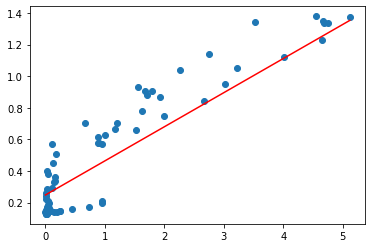

In [199]:
y_pred = m*X + c

plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

#Modelling

This is our final dataframe with 33 variables(one is dependent variable) which We are going to use in the model. I also set Quarter_data variable to index for better visualistions.

In [70]:
df.set_index('Quarter_date', inplace = True)

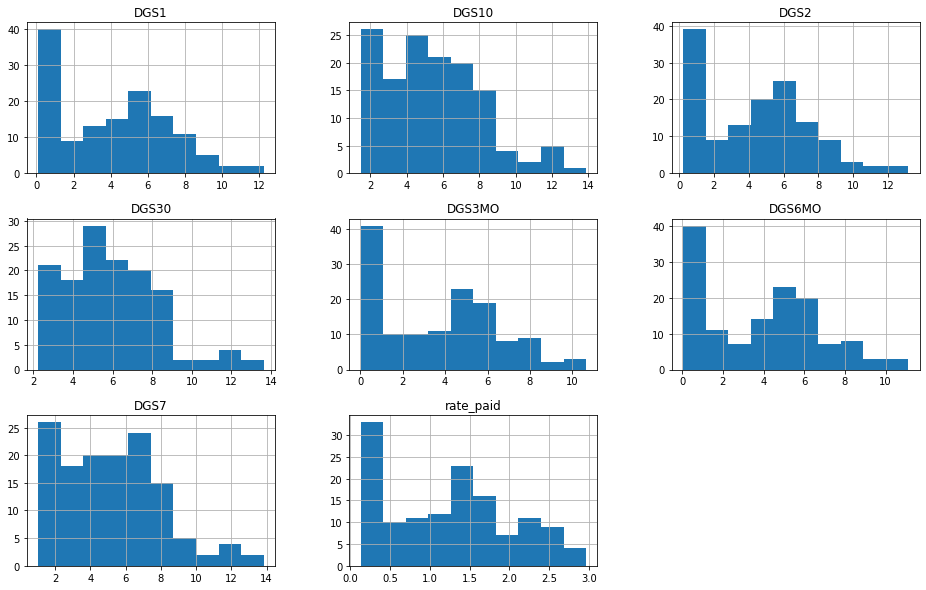

In [71]:
#Distribution of our main variables(without shiftedin a time)
# We can see that most of the observations are close to zero and more and less have similar distribution
df[['DGS1', 'DGS2', 'DGS3MO', 'DGS6MO', 'DGS7', 'DGS10', 'DGS30', 'rate_paid']].hist(figsize=(16, 10));

Below We can see visualization of treaury rates in time.
The descending trend with seasonality is visible in all features.
The same is for Deposit rate paid.
Based on the below plot I'm going to add one variable - time and see if it will bring any information 

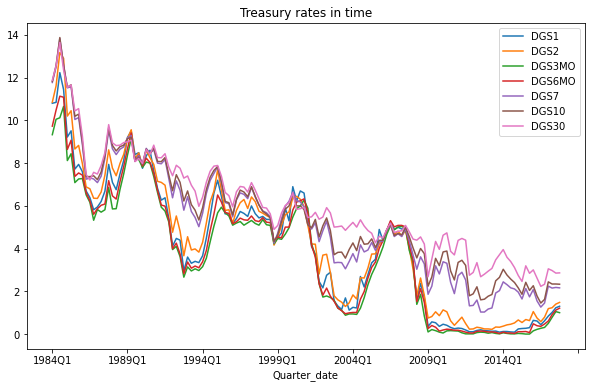

In [72]:
df[['DGS1', 'DGS2', 'DGS3MO', 'DGS6MO', 'DGS7', 'DGS10', 'DGS30']].plot(figsize = (10,6), title = 'Treasury rates in time');

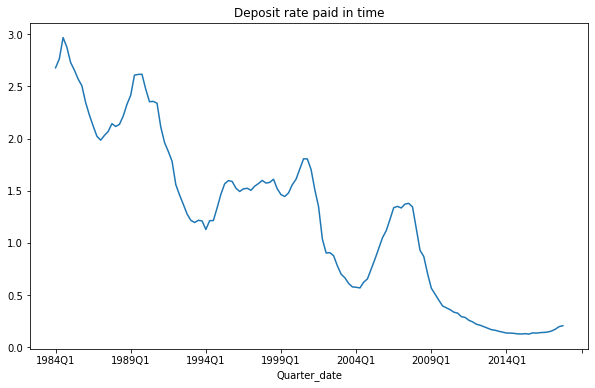

In [73]:
df['rate_paid'].plot(figsize = (10,6), title = 'Deposit rate paid in time');

Adding new feature(time) as a increasing value over time.
Now the final dataframe has 34 features(33 explanatory)

In [74]:
time = [i for i in range(1, len(df)+1)]
df['time'] = time
print(df.shape)
df.head()

(136, 34)


,DGS1,DGS2,DGS3MO,DGS5,DGS6MO,DGS7,DGS10,DGS30,DGS1-1,DGS1-2,DGS1-3,DGS2-1,DGS2-2,DGS2-3,DGS3MO-1,DGS3MO-2,DGS3MO-3,DGS5-1,DGS5-2,DGS5-3,DGS6MO-1,DGS6MO-2,DGS6MO-3,DGS7-1,DGS7-2,DGS7-3,DGS10-1,DGS10-2,DGS10-3,DGS30-1,DGS30-2,DGS30-3,rate_paid,time
Quarter_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984Q1,10.80,10.85,9.33,11.57,9.73,11.77,11.82,11.87,9.90,9.67,9.34,10.55,10.17,9.87,9.13,9.05,8.96,11.22,10.72,10.27,9.47,9.41,9.20,11.42,10.89,10.52,11.47,10.93,10.62,11.48,11.00,10.69,2.677636,1
1984Q2,10.84,11.61,10.05,12.29,10.48,12.50,12.56,12.55,10.80,9.90,9.67,10.85,10.55,10.17,9.33,9.13,9.05,11.57,11.22,10.72,9.73,9.47,9.41,11.77,11.42,10.89,11.82,11.47,10.93,11.87,11.48,11.00,2.762942,2
1984Q3,12.23,13.17,10.12,13.73,11.13,13.83,13.87,13.64,10.84,10.80,9.90,11.61,10.85,10.55,10.05,9.33,9.13,12.29,11.57,11.22,10.48,9.73,9.47,12.50,11.77,11.42,12.56,11.82,11.47,12.55,11.87,11.48,2.967099,3
1984Q4,11.44,12.90,10.65,12.51,11.08,12.60,12.54,12.35,12.23,10.84,10.80,13.17,11.61,10.85,10.12,10.05,9.33,13.73,12.29,11.57,11.13,10.48,9.73,13.83,12.50,11.77,13.87,12.56,11.82,13.64,12.55,11.87,2.875969,4
1985Q1,9.22,10.20,8.12,11.08,8.64,11.52,11.55,11.54,11.44,12.23,10.84,12.90,13.17,11.61,10.65,10.12,10.05,12.51,13.73,12.29,11.08,11.13,10.48,12.60,13.83,12.50,12.54,13.87,12.56,12.35,13.64,12.55,2.729222,5


Importing libraries for modelling

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Couple of boosting algorithms as they usually show the best performance
# Let's find out which one of them will perform the best
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

Below is the function for model evaluation as a scoring function I take negative mean absolute error so the closer to zero the better.
Due to the samll amount of observations cross validation with 5 splits and 3 repeat eems to be reasonable.

In [76]:
def evaluate_model(X, y, model):
	# define evaluation procedure, due to the size of our frame I limit number of splits to 5 with 3 repeats
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	return scores

Separating explanatory variables from dependent variable

In [77]:
X = df.drop(['rate_paid'], axis = 1)
y = df['rate_paid']

Firstly, let's evaluate model on all 33 features. 
Below I'm creating a list of models which will be fitted for the data and evaluated.

In [81]:
# creating a list of models to evaluate
def get_models():
	models, names = list(), list()
	# ElasticNet
	models.append(ElasticNet())#instead of regular LR to prevent a potential overfitting
	names.append('ElasticNet')
  #SVM
	models.append(LinearSVR())
	names.append('SVM')
  # DecisionTree
	models.append(DecisionTreeRegressor(min_impurity_split=5))
	names.append('DecisionTree')
	# RandomForest
	models.append(RandomForestRegressor(min_samples_split=5, n_estimators=150))
	names.append('RandomForest')
	# XGBoost
	models.append(XGBRFRegressor(n_estimators=2000, learning_rate=0.01))
	names.append('XGBoost')
	# LightGBM
	models.append(LGBMRegressor(n_estimators=2000, learning_rate=0.01))
	names.append('LightGBM')
	return models, names

Evaluating models:

In [82]:
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(X, y, models[i])
	results.append(scores)
	# summarize performance
	# I'm multiplying mean score * -1 because as a scoring I took neg_mean_absolute_error
	#and I want to have regular mean absolute error
	print('>%s %.3f (%.3f)' % (names[i], np.mean(scores)*(-1), np.std(scores)))

>ElasticNet 0.246 (0.021)
>SVM 0.128 (0.049)
>DecisionTree 0.682 (0.066)
>RandomForest 0.053 (0.008)
>XGBoost 0.872 (0.124)
>LightGBM 0.075 (0.015)


We can see the best performance on all 32 features seems to have Random Forest, also has a low variance. On average by 0.053% +- 0.008% our results differ from real value when it comes to predicting Deposit Rate Paid.
Below is a visual presentation of models performance

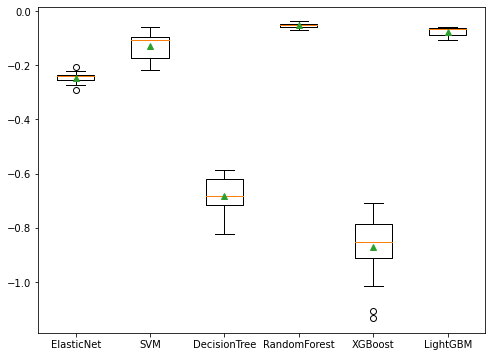

In [83]:
plt.figure(figsize=(8,6))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Now let's check if our as far best model -Random Forest would perform better with any feature transformation

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

Declaring the Pipeline with Random Forest model after feature transformations:

In [90]:
def get_pipelines(model):
	pipelines = list()
	# normalize
	p = Pipeline([('s',MinMaxScaler()), ('m',model)])
	pipelines.append(('MinMax', p))
	# standardize
	p = Pipeline([('s',StandardScaler()), ('m',model)])
	pipelines.append(('std', p))
	# quantile
	p = Pipeline([('s',QuantileTransformer(n_quantiles=10, output_distribution='normal')), ('m',model)])
	pipelines.append(('quan', p))
	# discretize
	p = Pipeline([('s',KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')), ('m',model)])
	pipelines.append(('kbins', p))
	# pca
	p = Pipeline([('s',PCA(10)), ('m',model)])
	pipelines.append(('pca', p))
	# svd
	p = Pipeline([('s',TruncatedSVD(n_components=7)), ('m',model)])
	pipelines.append(('svd', p))
	return pipelines

Id does not look like feature transformation would increase a performance of the model in this case. Results seem to be very similar with or without a feature transformation. 

>MinMax: 0.054 (0.007)
>std: 0.055 (0.008)
>quan: 0.054 (0.008)
>kbins: 0.063 (0.012)
>pca: 0.062 (0.012)
>svd: 0.066 (0.010)


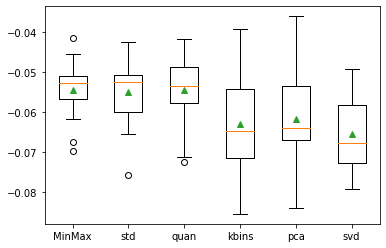

In [91]:
model = RandomForestRegressor(min_samples_split=5, n_estimators=150)
# get the modeling pipelines
pipelines = get_pipelines(model)
# evaluate each pipeline
results, names = list(), list()
for name, pipeline in pipelines:
	# evaluate
	scores = evaluate_model(X, y, pipeline)
	# summarize
	print('>%s: %.3f (%.3f)' % (name, np.mean(scores)*(-1), np.std(scores)))
	# store
	results.append(scores)
	names.append(name)
# plot the result
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Now let's check if there is any better model if We limit number of features.
Let's limit this number to 7 features.
To do this I'm going to use Recursive Feature Elimination class from sklearn.

In [92]:
from sklearn.feature_selection import RFE

In [93]:
# creating a list of models to evaluate
def get_models():
	models = dict()
  # ElasticNet
	rfe = RFE(estimator=ElasticNet(), n_features_to_select=7)
	model = ElasticNet()
	models['ElasticNet'] = Pipeline(steps=[('s',rfe),('m',model)])
  # SVM
	rfe = RFE(estimator=LinearSVR(), n_features_to_select=7)
	model = LinearSVR()
	models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
  # DecisionTree
	rfe = RFE(estimator=DecisionTreeRegressor(min_samples_split=5), n_features_to_select=7)
	model = DecisionTreeRegressor(min_samples_split=5)
	models['DecisionTree'] = Pipeline(steps=[('s',rfe),('m',model)])
  # RandomForest
	rfe = RFE(estimator=RandomForestRegressor(min_samples_split=5, n_estimators=150), n_features_to_select=7)
	model = RandomForestRegressor(min_samples_split=5, n_estimators=150)
	models['RandomForest'] = Pipeline(steps=[('s',rfe),('m',model)])
	# XGBoost
	rfe = RFE(estimator=XGBRFRegressor(n_estimators=2000, learning_rate=0.001), n_features_to_select=7)
	model = XGBRFRegressor(n_estimators=2000, learning_rate=0.001)
	models['XGBoost'] = Pipeline(steps=[('s',rfe),('m',model)])
	# LightGBM
	rfe = RFE(estimator=LGBMRegressor(n_estimators=2000, learning_rate=0.001), n_features_to_select=7)
	model = LGBMRegressor(n_estimators=2000, learning_rate=0.001)
	models['lgm'] = Pipeline(steps=[('s',rfe),('m',model)])
 
	return models

In [95]:
def evaluate_model_2(model):
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	return scores

In [96]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model_2(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores)*(-1), np.std(scores)))

>ElasticNet 0.246 (0.021)
>SVM 0.106 (0.031)
>DecisionTree 0.087 (0.011)
>RandomForest 0.055 (0.010)
>XGBoost 0.880 (0.125)
>lgm 0.135 (0.023)


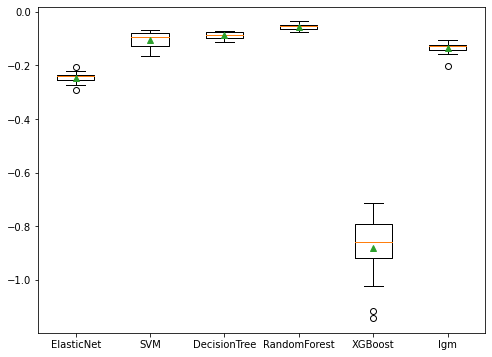

In [97]:
# plotting model performance for comparison
plt.figure(figsize = (8,6))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Again Random Forest presents the best performance and seems to be very stable.
Let's find which features were selected and the ranking of all features. Nevertheless results look the best for Random Forest with all 33 featureas.

In [98]:
rfe = RFE(estimator=RandomForestRegressor(min_samples_split=5, n_estimators=150), n_features_to_select=7)
# fit RFE
rfe.fit(X, y)
# summarize all features
print(X.columns[rfe.support_], '\n')
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Index(['DGS2', 'DGS3MO', 'DGS1-1', 'DGS2-1', 'DGS2-2', 'DGS3MO-1', 'time'], dtype='object') 

Column: 0, Selected False, Rank: 8.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 7.000
Column: 4, Selected False, Rank: 5.000
Column: 5, Selected False, Rank: 16.000
Column: 6, Selected False, Rank: 23.000
Column: 7, Selected False, Rank: 20.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000
Column: 10, Selected False, Rank: 12.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 14.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 6.000
Column: 16, Selected False, Rank: 10.000
Column: 17, Selected False, Rank: 4.000
Column: 18, Selected False, Rank: 11.000
Column: 19, Selected False, Rank: 17.000
Column: 20, Selected False, Rank: 3.000
Column: 21, Selected False, Rank: 9.000
Column: 22, Selected False, Rank: 

And once again let's check if model performs any better with any feature performance. But this time due to limited number of features We need to modify number of components in PCA and in TruncatedSVD

In [100]:
def get_pipelines(model):
	pipelines = list()
	# normalize
	p = Pipeline([('s',MinMaxScaler()), ('m',model)])
	pipelines.append(('MinMax', p))
	# standardize
	p = Pipeline([('s',StandardScaler()), ('m',model)])
	pipelines.append(('std', p))
	# quantile
	p = Pipeline([('s',QuantileTransformer(n_quantiles=5, output_distribution='normal')), ('m',model)])
	pipelines.append(('quan', p))
	# discretize
	p = Pipeline([('s',KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')), ('m',model)])
	pipelines.append(('kbins', p))
	# pca
	p = Pipeline([('s',PCA(4)), ('m',model)])
	pipelines.append(('pca', p))
	# svd
	p = Pipeline([('s',TruncatedSVD(n_components=4)), ('m',model)])
	pipelines.append(('svd', p))
	return pipelines

There is no significant difference if We use feture transformation.
Nevertheless with Truncated SVD We have a slightly better results than before but this is very small difference with very little higher variance. 

>MinMax: 0.053 (0.009)
>std: 0.053 (0.009)
>quan: 0.054 (0.009)
>kbins: 0.067 (0.010)
>pca: 0.057 (0.012)
>svd: 0.051 (0.011)


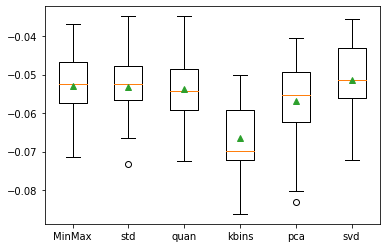

In [101]:
model = RandomForestRegressor(min_samples_split=5, n_estimators=150)
# get the modeling pipelines
pipelines = get_pipelines(model)
# evaluate each pipeline
results, names = list(), list()
for name, pipeline in pipelines:
	# evaluate
	scores = evaluate_model(X[X.columns[rfe.support_]], y, pipeline)
	# summarize
	print('>%s: %.3f (%.3f)' % (name, np.mean(scores)*(-1), np.std(scores)))
	# store
	results.append(scores)
	names.append(name)
# plot the result
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Now it's time to check feature importance.
As a score function I'm going to use mutual information for regression which estimates mutual information for a continuous target variable..

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Source: sklearn.org

link:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#r37d39d7589e2-1

In [102]:
from sklearn.feature_selection import mutual_info_regression

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [104]:
mut_info = mutual_info_regression(X_train,y_train)

It looks like all the fatures have a decent score.
It's hard to pick certain amount of fetures based on this score to get better result.

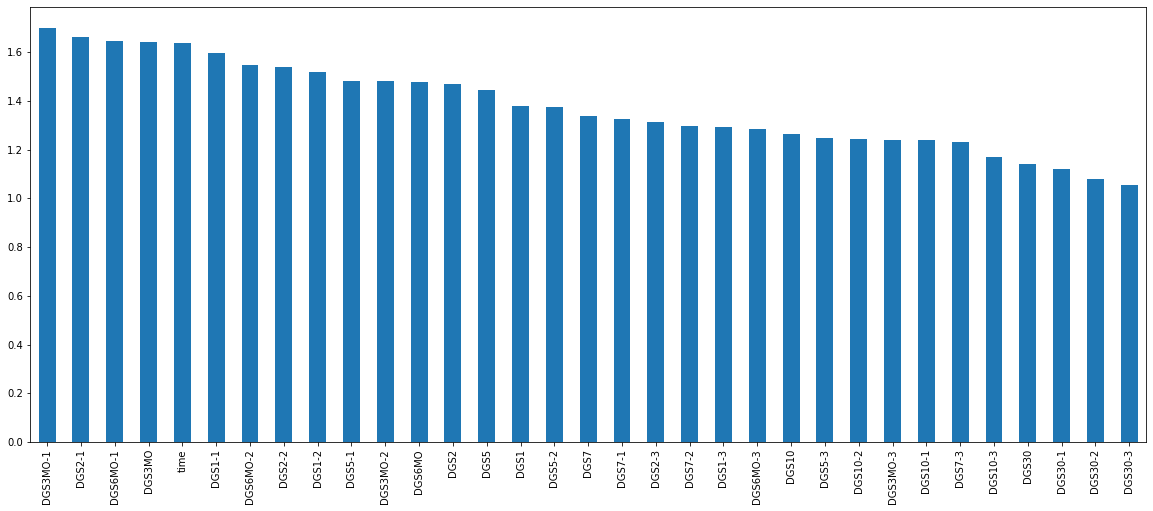

In [105]:
# As shown below could be grasped that only couple features seem to have significant impact on dependent variable
mut_info = pd.Series(mut_info)
mut_info.index = X.columns
mut_info.sort_values(ascending=False)
mut_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

Now let's try to make a feature selection by taking feature importance from as far best model Random Forest

In [106]:
rf = RandomForestRegressor(min_samples_split=5, n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

It's a little bit different, features do not have such similar score as before

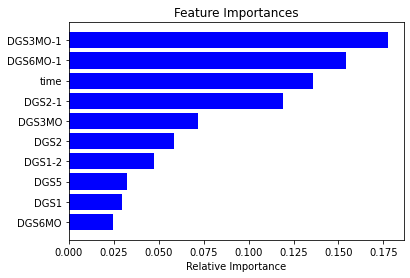

In [107]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Importing feature selection class to see if We can get any better results with specific combinations of features

In [108]:
from sklearn.feature_selection import RFECV

In [109]:
rfecv = RFECV(estimator=RandomForestRegressor(min_samples_split=5, n_estimators=150), step=1, cv=5,
              scoring= 'explained_variance')

In [110]:
rfecv.fit(X, y)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=5,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=150, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='explained_variance',
      step=1, verbose=0)

Optimal number of features : 31


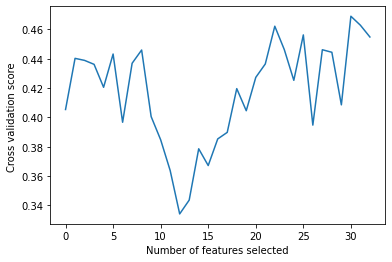

In [111]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Ploting number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score ")
plt.plot(rfecv.grid_scores_)
plt.show()

The 5 best features:

In [112]:
X.columns[rfecv.support_]

Index(['DGS1', 'DGS2', 'DGS3MO', 'DGS5', 'DGS6MO', 'DGS7', 'DGS10', 'DGS1-1',
       'DGS1-2', 'DGS1-3', 'DGS2-1', 'DGS2-2', 'DGS2-3', 'DGS3MO-1',
       'DGS3MO-2', 'DGS3MO-3', 'DGS5-1', 'DGS5-2', 'DGS5-3', 'DGS6MO-1',
       'DGS6MO-2', 'DGS6MO-3', 'DGS7-1', 'DGS7-2', 'DGS7-3', 'DGS10-1',
       'DGS10-2', 'DGS10-3', 'DGS30-1', 'DGS30-2', 'time'],
      dtype='object')

Now let's evaluate the model once more with those 31 features.
Results are very similar but the best score as far We got with 33 features.

In [114]:
scoring = evaluate_model(X[X.columns[rfecv.support_]], y, RandomForestRegressor(min_samples_split=5, n_estimators=150))
print(np.mean(scoring)*(-1), np.std(scoring))

0.05474752241212825 0.0073119127506537105


To move it even further I'm going to use GridSearch class to find best hyper parameters of the Random Forest model.

In [115]:
from sklearn.model_selection import GridSearchCV

Declaring parameters to check

In [116]:
params = {
               'n_estimators': np.arange(100, 300, 50),
               'max_depth': np.arange(5, 7),
               'min_samples_split': np.arange(3, 10, 2)

            }

best hyperparameters:

In [118]:
RF_grid=GridSearchCV(RandomForestRegressor(), params,cv = 5, scoring = 'neg_mean_absolute_error')
RF_grid.fit(X,y)
print("tuned hyperparameters :(best parameters) ",RF_grid.best_params_)

tuned hyperparameters :(best parameters)  {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 200}


So, potentially this is the best model We can get:

RandomForest with max depth: 5, min sample split: 3 and with 200 trees,

Features:'DGS1', 'DGS2', 'DGS1-2', 'DGS2-1', 'DGS2-2', 'DGS3MO-1', 'time'


In [121]:
model = RandomForestRegressor(min_samples_split=3, n_estimators=200, max_depth=6)
scores = evaluate_model(X, y, model)
# summarize
print('>%s: %.3f (%.3f)' % ('result:', np.mean(scores)*(-1), np.std(scores)))
# 	# store
# results.append(scores)
# 	names.append(name)
# # plot the result
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

>result:: 0.053 (0.007)


Now I'm going to check if I can get any better result.
To do this I'm going to build Neural Network model.

In [122]:
#Importing Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [146]:
# Defining the model with the following parameters 
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

In [147]:
model = build_model()

In [148]:
# Summary of the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                2176      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


In [149]:
# Instaed of printing out the model progress during training I decided to create a class that displaying training progress
# by printing a dot word for each completed epoch. It saves some space on the report
class PrintTraining(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [150]:
# Training the model for 150 epochs, and record the training and validation error in the history object.
history = model.fit(
  X, y,
  epochs=150, validation_split = 0.3, verbose=0,
  callbacks=[PrintTraining()])


....................................................................................................
..................................................

Plotting the result.
With the first epochs model shows high variance but after about 70 iterations shows very stable performance.
The performance of the model looks really nice.
After 150 epochs model seems to have the best performance and is very stable.

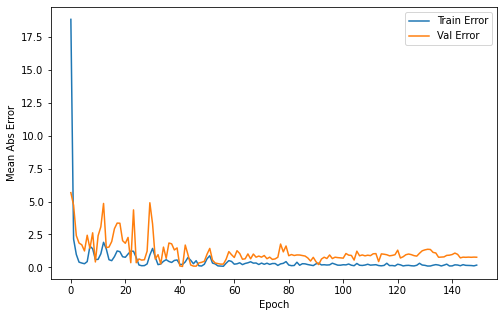

In [151]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (8,5))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend(loc = 'best')



plot_history(history)

Now let's evaluate the model with cross validation to compare the performance to as yet the best model

In [152]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold

In [154]:
# defining base model
def baseline_model():
	# creating model
  model = Sequential()
  model.add(Dense(64, input_dim = 33, activation = 'relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  # Compiling model
  model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.RMSprop(0.01), metrics=['mae'])
  return(model)	

In [156]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=150, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)

Below are results of the cross validated Deep learning model.
Looks like Random Forest is still the best

Baseline: 0.14 (0.13) MSE


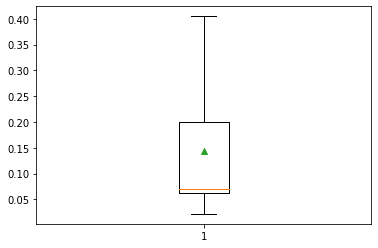

In [157]:
print("Baseline: %.2f (%.2f) MSE" % (results.mean()*(-1), results.std()))
pyplot.boxplot(results*(-1), showmeans=True);

Quick summary:

It turned out the best model to predict Deposit rate paid is Random Forest with following parameters:

max_depth = 5

min_sample_split = 3

number of trees: 200

Features: all features

mean absolute error is 0.053 so in predicting Deposit rate paid on average We are off the true value by about 0.053%.

Random forest with Truncated SVD transformation with following features: 'DGS2', 'DGS3MO', 'DGS1-1', 'DGS2-1', 'DGS2-2', 'DGS3MO-1', 'time' can also be used, has even smaller error but in cost of little higher variance.

Due to the fact I was limited to provided variables when it comes to explanatory variables my model was based only on them.
The task was to find a model that uses US treasury rates to describe the deposit rate paid so I treated it as a Regression problem.
If it was not an issue I would consider applying time series model like : ARIMA or SARIMAX, I would also consider fetures like: interest rate(the lower the less people keep their money on the account, less interest rate also means that less money is paid to the depositors), unemployment, GDP